# Classifying newswires: a multi-class classification example

In [1]:
from tensorflow import keras as keras

## The Reuters dataset

In [2]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 24s 11us/step


In [3]:
train_data.shape

(8982,)

In [4]:
train_labels.shape

(8982,)

In [6]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [7]:
word_index = keras.datasets.reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)

557056/550378 [==============================] - 56s 100us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [8]:
train_labels[0]

3

## Preparing the data

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

Keras 内置方法可以实现这个操作

In [13]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Building our network

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Validating our approach

In [16]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 186us/sample - loss: 2.5119 - accuracy: 0.5158 - val_loss: 1.6455 - val_accuracy: 0.6570
Epoch 2/20
7982/7982 [==============================] - 1s 80us/sample - loss: 1.3477 - accuracy: 0.7189 - val_loss: 1.2741 - val_accuracy: 0.7310
Epoch 3/20
7982/7982 [==============================] - 1s 84us/sample - loss: 1.0099 - accuracy: 0.7868 - val_loss: 1.1055 - val_accuracy: 0.7650
Epoch 4/20
7982/7982 [==============================] - 1s 81us/sample - loss: 0.7969 - accuracy: 0.8302 - val_loss: 1.0288 - val_accuracy: 0.7810
Epoch 5/20
7982/7982 [==============================] - 1s 88us/sample - loss: 0.6363 - accuracy: 0.8658 - val_loss: 0.9670 - val_accuracy: 0.7980
Epoch 6/20
7982/7982 [==============================] - 1s 89us/sample - loss: 0.5101 - accuracy: 0.8895 - val_loss: 0.9217 - val_accuracy: 0.8070
Epoch 7/20
7982/7982 [==============================] - 1s 81us/sampl

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

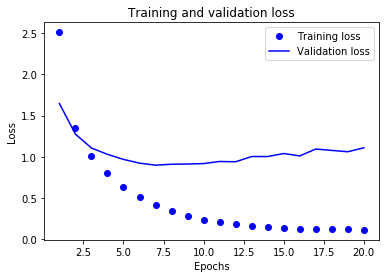

In [23]:
import matplotlib.pyplot as plt

%matplotlib inline
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

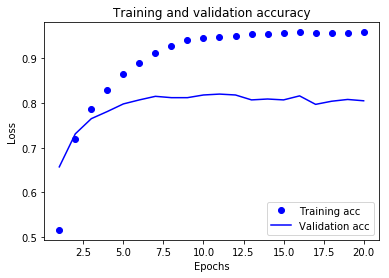

In [24]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

存在过拟合现象，减少训练轮次

In [25]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 138us/sample - loss: 3.3535 - accuracy: 0.4316 - val_loss: 2.6537 - val_accuracy: 0.5880
Epoch 2/8
7982/7982 [==============================] - 1s 80us/sample - loss: 2.1131 - accuracy: 0.6297 - val_loss: 1.7108 - val_accuracy: 0.6580
Epoch 3/8
7982/7982 [==============================] - 1s 81us/sample - loss: 1.4082 - accuracy: 0.7190 - val_loss: 1.3250 - val_accuracy: 0.7110
Epoch 4/8
7982/7982 [==============================] - 1s 84us/sample - loss: 1.0662 - accuracy: 0.7729 - val_loss: 1.1608 - val_accuracy: 0.7560
Epoch 5/8
7982/7982 [==============================] - 1s 85us/sample - loss: 0.8432 - accuracy: 0.8218 - val_loss: 1.0708 - val_accuracy: 0.7790
Epoch 6/8
7982/7982 [==============================] - 1s 81us/sample - loss: 0.6733 - accuracy: 0.8566 - val_loss: 1.0059 - val_accuracy: 0.7950
Epoch 7/8
7982/7982 [==============================] - 1s 83us/sample - los

In [26]:
results

[0.9903121491361705, 0.7898486]

完全随机的准确率

In [27]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18432769367764915

## Generating predictions on new data

In [28]:
predictions = model.predict(x_test)

In [29]:
predictions[0].shape

(46,)

In [30]:
np.sum(predictions[0])

0.9999997

In [31]:
np.argmax(predictions[0])

3

## A different way to handle the labels and the loss

另一种编码标签的方法，就是将其转换为整数张量

In [32]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

对于这种编码方法，唯一需要改变的是损失函数的选择。对于使用的损失函数categorical_crossentropy，标签应该遵循分类编码。对于整数标签，你应该使用sparse_categorical_crossentropy

In [33]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

## On the importance of having sufficiently large intermediate layers

中间层维度应足够大。最终输出是46 维的，因此中间层的隐藏单元个数不应该比46 小太多。如果中间层的维度远远小于46（比如4 维），造成了信息瓶颈，

In [34]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 171us/sample - loss: 2.5395 - accuracy: 0.4965 - val_loss: 1.8181 - val_accuracy: 0.5820
Epoch 2/20
7982/7982 [==============================] - 1s 110us/sample - loss: 1.5886 - accuracy: 0.6016 - val_loss: 1.5538 - val_accuracy: 0.6100
Epoch 3/20
7982/7982 [==============================] - 1s 134us/sample - loss: 1.3406 - accuracy: 0.6535 - val_loss: 1.4542 - val_accuracy: 0.6390
Epoch 4/20
7982/7982 [==============================] - 1s 131us/sample - loss: 1.1724 - accuracy: 0.6884 - val_loss: 1.3860 - val_accuracy: 0.6610
Epoch 5/20
7982/7982 [==============================] - 1s 103us/sample - loss: 1.0373 - accuracy: 0.7135 - val_loss: 1.3481 - val_accuracy: 0.6700
Epoch 6/20
7982/7982 [==============================] - 1s 100us/sample - loss: 0.9305 - accuracy: 0.7357 - val_loss: 1.3332 - val_accuracy: 0.6740
Epoch 7/20
7982/7982 [==============================] - 1s 97us/

现在网络的验证精度最大约为71%，比前面下降了8%。导致这一下降的主要原因在于，你试图将大量信息（这些信息足够恢复46 个类别的分割超平面）压缩到维度很小的中间空间。网络能够将大部分必要信息塞入这个四维表示中，但并不是全部信息。